In [1]:
!apt-get install graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


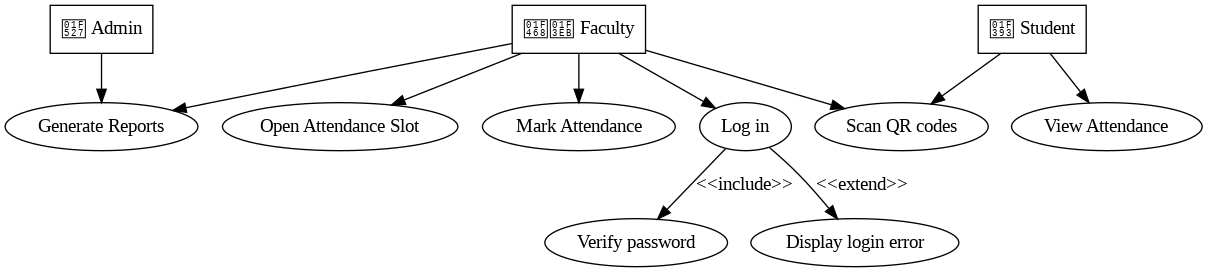

In [2]:
import graphviz

use_case_diagram = """
digraph UseCaseDiagram {
    rankdir=TB;
    # Actors
    Faculty [shape=box, label="👨‍🏫 Faculty"]
    Student [shape=box, label="🎓 Student"]
    Admin [shape=box, label="🔧 Admin"]

    # Use Cases
    "Log in" [shape=ellipse]
    "Open Attendance Slot" [shape=ellipse]
    "Scan QR codes" [shape=ellipse]
    "View Attendance" [shape=ellipse]
    "Mark Attendance" [shape=ellipse]
    "Generate Reports" [shape=ellipse]

    # Relationships
    Faculty -> "Log in"
    Faculty -> "Open Attendance Slot"
    Faculty -> "Scan QR codes"
    Faculty -> "Mark Attendance"
    Faculty -> "Generate Reports"

    Student -> "Scan QR codes"
    Student -> "View Attendance"

    Admin -> "Generate Reports"

    "Log in" -> "Verify password" [label="<<include>>"]
    "Log in" -> "Display login error" [label="<<extend>>"]
}
"""

dot = graphviz.Source(use_case_diagram, format="png")
dot.render("use_case_diagram")
from IPython.display import display, Image
display(Image("use_case_diagram.png"))


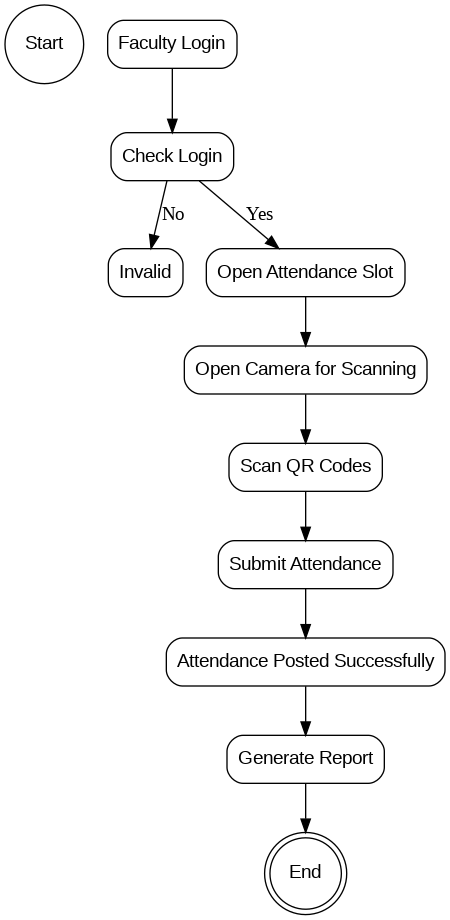

In [3]:
import graphviz

activity_diagram = """
digraph ActivityDiagram {
    rankdir=TB;
    node [shape=rectangle, style=rounded, fontname="Arial"]

    Start [shape=circle, label="Start"]
    "Faculty Login" -> "Check Login"
    "Check Login" -> "Invalid" [label="No"]
    "Check Login" -> "Open Attendance Slot" [label="Yes"]

    "Open Attendance Slot" -> "Open Camera for Scanning"
    "Open Camera for Scanning" -> "Scan QR Codes"
    "Scan QR Codes" -> "Submit Attendance"

    "Submit Attendance" -> "Attendance Posted Successfully"
    "Attendance Posted Successfully" -> "Generate Report"
    "Generate Report" -> End

    End [shape=doublecircle, label="End"]
}
"""

dot = graphviz.Source(activity_diagram, format="png")
dot.render("activity_diagram")
from IPython.display import display, Image
display(Image("activity_diagram.png"))


In [4]:
!apt-get install graphviz
!pip install plantuml


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


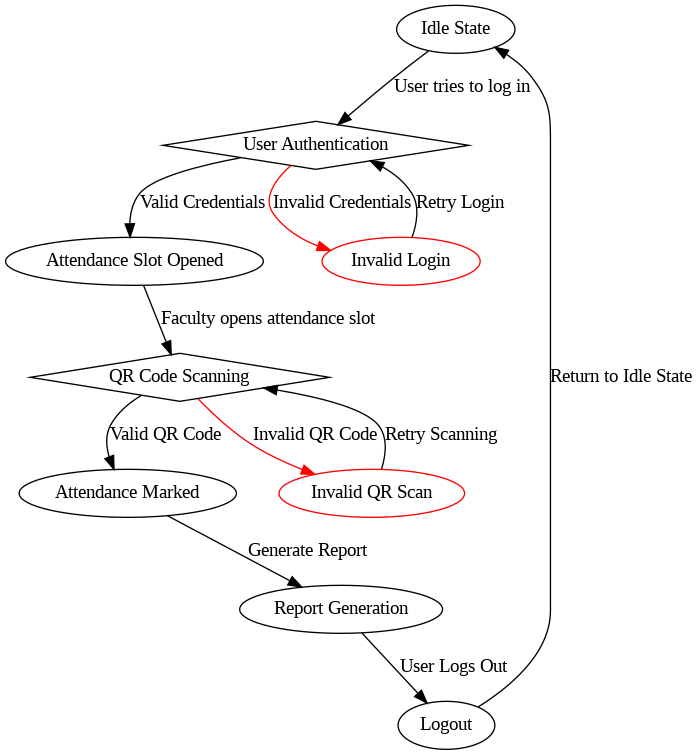

In [5]:
from graphviz import Digraph
from IPython.display import display
from PIL import Image

def generate_state_chart():
    dot = Digraph('StateChart', format='png')

    # Define states
    dot.node('Idle', 'Idle State', shape='ellipse')
    dot.node('Auth', 'User Authentication', shape='diamond')
    dot.node('OpenSlot', 'Attendance Slot Opened', shape='ellipse')
    dot.node('ScanQR', 'QR Code Scanning', shape='diamond')
    dot.node('Marked', 'Attendance Marked', shape='ellipse')
    dot.node('Report', 'Report Generation', shape='ellipse')
    dot.node('Logout', 'Logout', shape='ellipse')
    dot.node('InvalidAuth', 'Invalid Login', shape='ellipse', color='red')
    dot.node('InvalidScan', 'Invalid QR Scan', shape='ellipse', color='red')

    # Define transitions
    dot.edge('Idle', 'Auth', label='User tries to log in')
    dot.edge('Auth', 'OpenSlot', label='Valid Credentials')
    dot.edge('Auth', 'InvalidAuth', label='Invalid Credentials', color='red')
    dot.edge('InvalidAuth', 'Auth', label='Retry Login')

    dot.edge('OpenSlot', 'ScanQR', label='Faculty opens attendance slot')
    dot.edge('ScanQR', 'Marked', label='Valid QR Code')
    dot.edge('ScanQR', 'InvalidScan', label='Invalid QR Code', color='red')
    dot.edge('InvalidScan', 'ScanQR', label='Retry Scanning')

    dot.edge('Marked', 'Report', label='Generate Report')
    dot.edge('Report', 'Logout', label='User Logs Out')
    dot.edge('Logout', 'Idle', label='Return to Idle State')

    # Save and Display
    filename = dot.render('state_chart_diagram', format='png', cleanup=True)
    display(Image.open(filename))

# Generate and show the diagram
generate_state_chart()


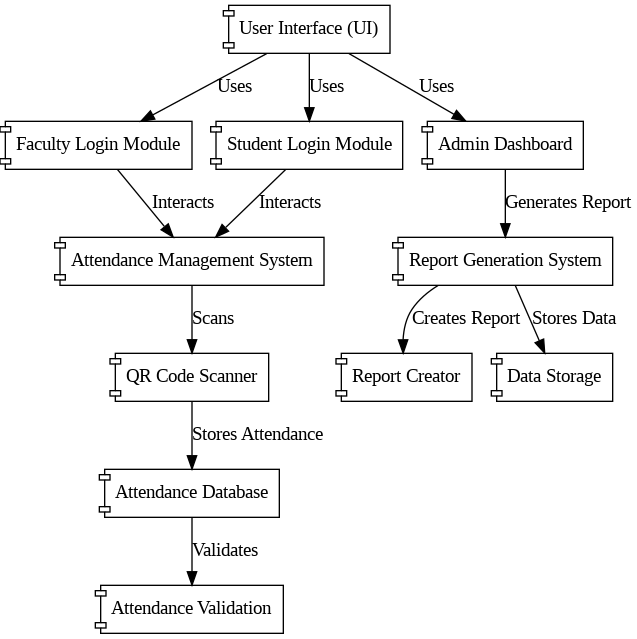

In [6]:
def generate_component_diagram():
    dot = Digraph('ComponentDiagram', format='png')

    # Define Components
    dot.node('UI', 'User Interface (UI)', shape='component')
    dot.node('Faculty', 'Faculty Login Module', shape='component')
    dot.node('Student', 'Student Login Module', shape='component')
    dot.node('Admin', 'Admin Dashboard', shape='component')
    dot.node('Attendance', 'Attendance Management System', shape='component')
    dot.node('QRScanner', 'QR Code Scanner', shape='component')
    dot.node('DB', 'Attendance Database', shape='component')
    dot.node('Validation', 'Attendance Validation', shape='component')
    dot.node('ReportSystem', 'Report Generation System', shape='component')
    dot.node('ReportCreator', 'Report Creator', shape='component')
    dot.node('DataStorage', 'Data Storage', shape='component')

    # Define Connections
    dot.edge('UI', 'Faculty', label='Uses')
    dot.edge('UI', 'Student', label='Uses')
    dot.edge('UI', 'Admin', label='Uses')
    dot.edge('Faculty', 'Attendance', label='Interacts')
    dot.edge('Student', 'Attendance', label='Interacts')
    dot.edge('Attendance', 'QRScanner', label='Scans')
    dot.edge('QRScanner', 'DB', label='Stores Attendance')
    dot.edge('DB', 'Validation', label='Validates')
    dot.edge('Admin', 'ReportSystem', label='Generates Report')
    dot.edge('ReportSystem', 'ReportCreator', label='Creates Report')
    dot.edge('ReportSystem', 'DataStorage', label='Stores Data')

    # Save and Display
    filename = dot.render('component_diagram', format='png', cleanup=True)
    display(Image.open(filename))

# Generate and show the diagram
generate_component_diagram()


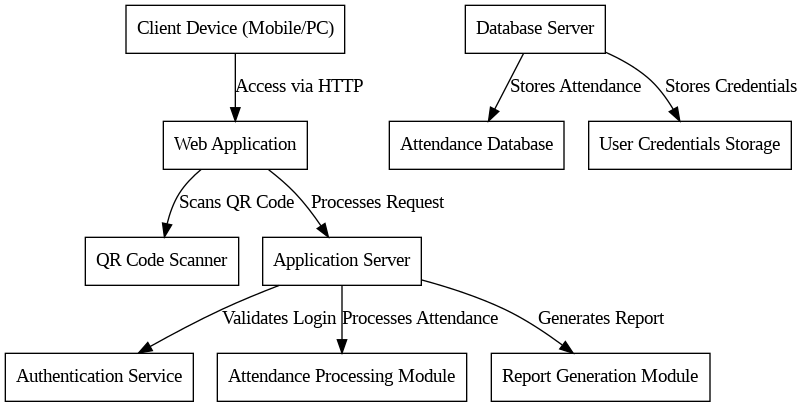

In [7]:
def generate_deployment_diagram():
    dot = Digraph('DeploymentDiagram', format='png')

    # Define Nodes
    dot.node('Client', 'Client Device (Mobile/PC)', shape='box')
    dot.node('WebApp', 'Web Application', shape='box')
    dot.node('Scanner', 'QR Code Scanner', shape='box')
    dot.node('Server', 'Application Server', shape='box')
    dot.node('AuthService', 'Authentication Service', shape='box')
    dot.node('AttendanceModule', 'Attendance Processing Module', shape='box')
    dot.node('ReportModule', 'Report Generation Module', shape='box')
    dot.node('DBServer', 'Database Server', shape='box')
    dot.node('AttendanceDB', 'Attendance Database', shape='box')
    dot.node('UserDB', 'User Credentials Storage', shape='box')

    # Define Connections
    dot.edge('Client', 'WebApp', label='Access via HTTP')
    dot.edge('WebApp', 'Server', label='Processes Request')
    dot.edge('WebApp', 'Scanner', label='Scans QR Code')
    dot.edge('Server', 'AuthService', label='Validates Login')
    dot.edge('Server', 'AttendanceModule', label='Processes Attendance')
    dot.edge('Server', 'ReportModule', label='Generates Report')
    dot.edge('DBServer', 'AttendanceDB', label='Stores Attendance')
    dot.edge('DBServer', 'UserDB', label='Stores Credentials')

    # Save and Display
    filename = dot.render('deployment_diagram', format='png', cleanup=True)
    display(Image.open(filename))

# Generate and show the diagram
generate_deployment_diagram()


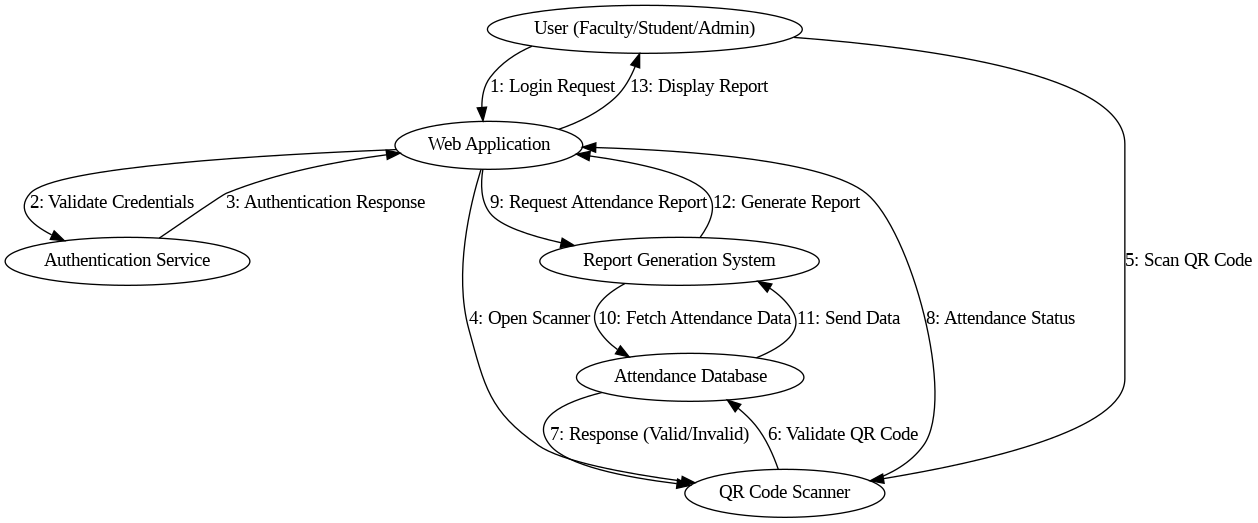

In [8]:
from graphviz import Digraph
from IPython.display import display
from PIL import Image

def generate_collaboration_diagram():
    dot = Digraph('CollaborationDiagram', format='png')

    # Define Objects
    dot.node('User', 'User (Faculty/Student/Admin)', shape='ellipse')
    dot.node('WebApp', 'Web Application', shape='ellipse')
    dot.node('AuthService', 'Authentication Service', shape='ellipse')
    dot.node('QRScanner', 'QR Code Scanner', shape='ellipse')
    dot.node('DB', 'Attendance Database', shape='ellipse')
    dot.node('ReportSystem', 'Report Generation System', shape='ellipse')

    # Define Messages & Interactions
    dot.edge('User', 'WebApp', label='1: Login Request')
    dot.edge('WebApp', 'AuthService', label='2: Validate Credentials')
    dot.edge('AuthService', 'WebApp', label='3: Authentication Response')
    dot.edge('WebApp', 'QRScanner', label='4: Open Scanner')
    dot.edge('User', 'QRScanner', label='5: Scan QR Code')
    dot.edge('QRScanner', 'DB', label='6: Validate QR Code')
    dot.edge('DB', 'QRScanner', label='7: Response (Valid/Invalid)')
    dot.edge('QRScanner', 'WebApp', label='8: Attendance Status')
    dot.edge('WebApp', 'ReportSystem', label='9: Request Attendance Report')
    dot.edge('ReportSystem', 'DB', label='10: Fetch Attendance Data')
    dot.edge('DB', 'ReportSystem', label='11: Send Data')
    dot.edge('ReportSystem', 'WebApp', label='12: Generate Report')
    dot.edge('WebApp', 'User', label='13: Display Report')

    # Save and Display
    filename = dot.render('collaboration_diagram', format='png', cleanup=True)
    display(Image.open(filename))

# Generate and show the diagram
generate_collaboration_diagram()
